# Example: Univariate forecast
--------------------

This example shows how to use ATOM to work with a univariate time series dataset.

Import the airline dataset from [sktime.datasets](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.datasets.load_airline.html). This is a small and easy to train dataset that measures monthly totals of international airline passengers from 1949 to 1960.

## Load the data

In [1]:
# Import packages
import numpy as np
from sktime.datasets import load_airline
from atom import ATOMForecaster

In [2]:
# Load the data
y = load_airline()

print(y)

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64


## Analyze the data

In [3]:
atom = ATOMForecaster(y, verbose=2, random_state=1)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Univariate forecast.

Dataset stats ==================== >>
Shape: (144, 1)
Train set size: 116
 --> From: 1949-01  To: 1958-08
Test set size: 28
 --> From: 1958-09  To: 1960-12
-------------------------------------
Memory: 6.47 kB
Duplicates: 26 (18.1%)



In [4]:
# Since the dataset contains only the target column, atom.X is empty
atom.X

Empty DataFrame
Columns: []
Index: [1949-01, 1949-02, 1949-03, 1949-04, 1949-05, 1949-06, 1949-07, 1949-08, 1949-09, 1949-10, 1949-11, 1949-12, 1950-01, 1950-02, 1950-03, 1950-04, 1950-05, 1950-06, 1950-07, 1950-08, 1950-09, 1950-10, 1950-11, 1950-12, 1951-01, 1951-02, 1951-03, 1951-04, 1951-05, 1951-06, 1951-07, 1951-08, 1951-09, 1951-10, 1951-11, 1951-12, 1952-01, 1952-02, 1952-03, 1952-04, 1952-05, 1952-06, 1952-07, 1952-08, 1952-09, 1952-10, 1952-11, 1952-12, 1953-01, 1953-02, 1953-03, 1953-04, 1953-05, 1953-06, 1953-07, 1953-08, 1953-09, 1953-10, 1953-11, 1953-12, 1954-01, 1954-02, 1954-03, 1954-04, 1954-05, 1954-06, 1954-07, 1954-08, 1954-09, 1954-10, 1954-11, 1954-12, 1955-01, 1955-02, 1955-03, 1955-04, 1955-05, 1955-06, 1955-07, 1955-08, 1955-09, 1955-10, 1955-11, 1955-12, 1956-01, 1956-02, 1956-03, 1956-04, 1956-05, 1956-06, 1956-07, 1956-08, 1956-09, 1956-10, 1956-11, 1956-12, 1957-01, 1957-02, 1957-03, 1957-04, ...]

[144 rows x 0 columns]

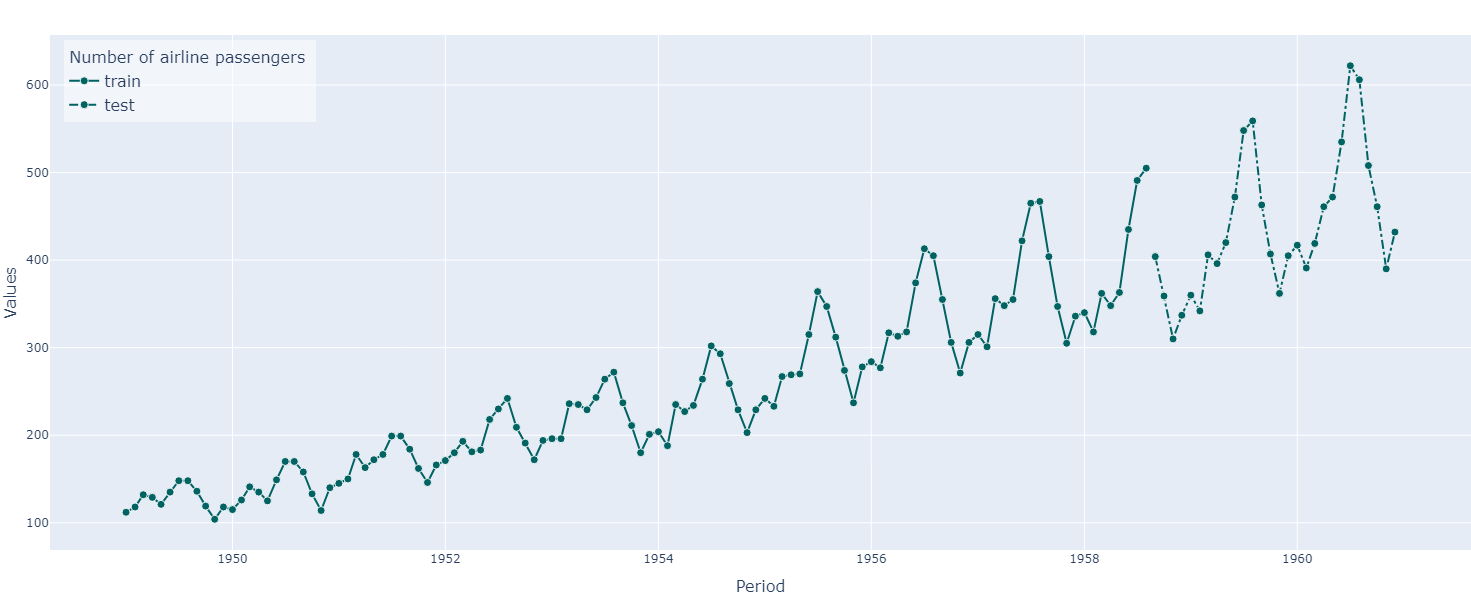

In [5]:
# Examine the dataset
atom.plot_series()

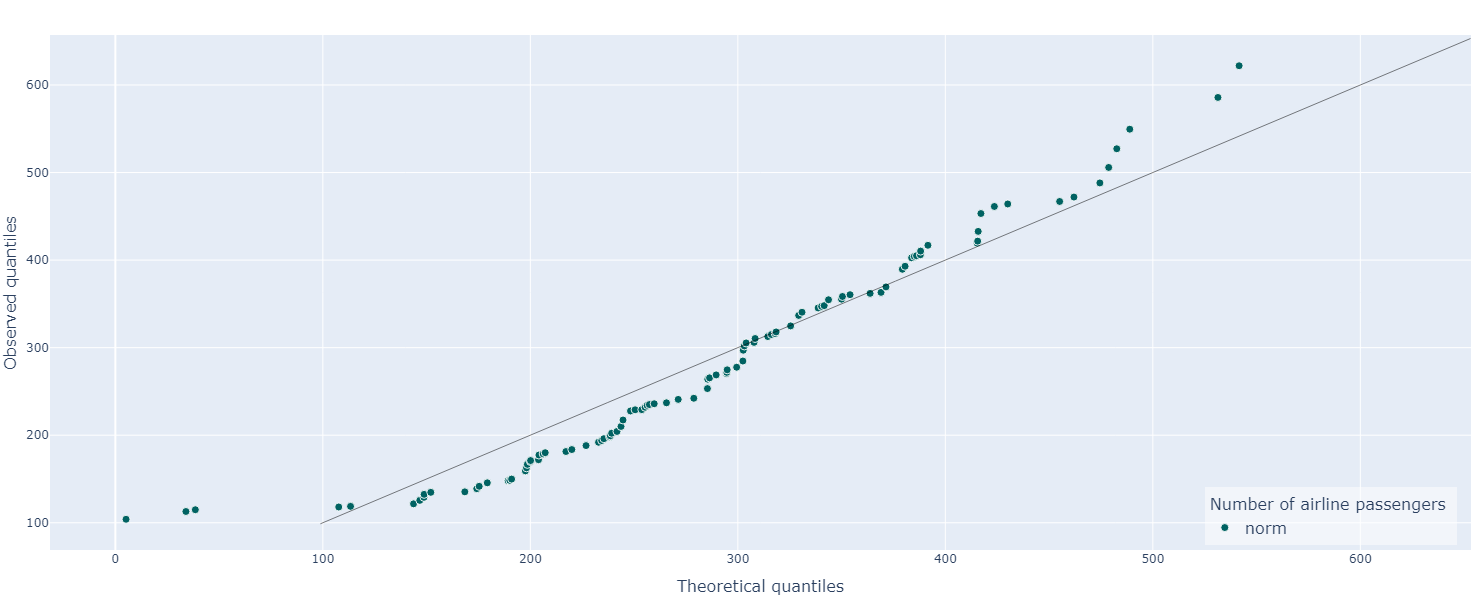

In [6]:
atom.plot_qq()

## Seasonality

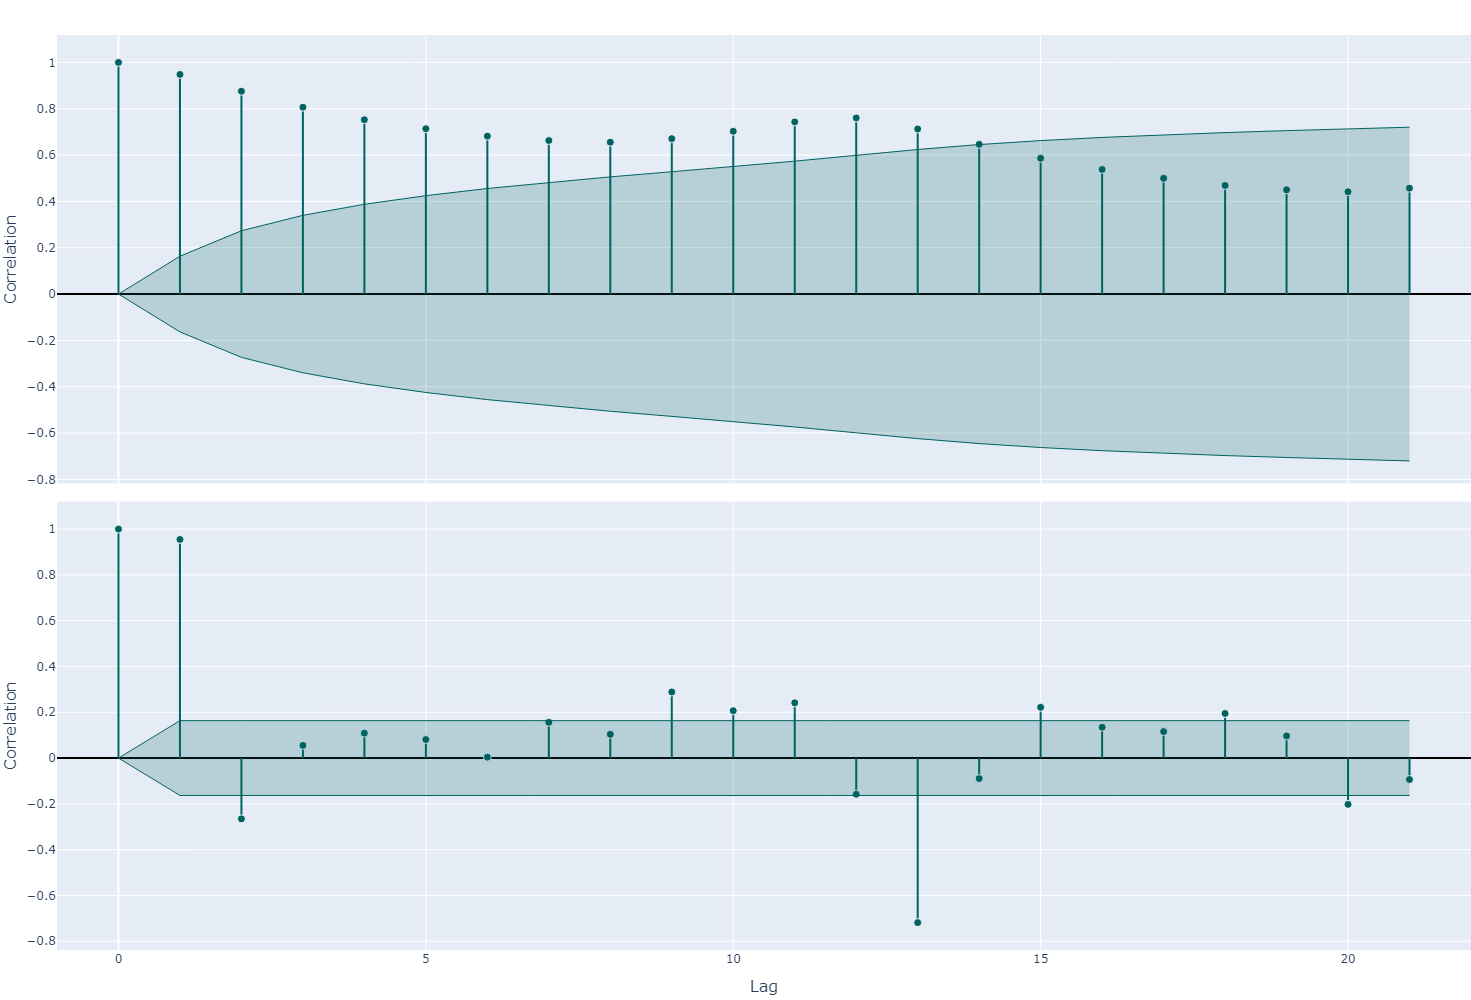

In [7]:
# ATOM has a number of plots to understand the seasonality of the data
with atom.canvas(rows=2, cols=1, sharex=True, vspace=0.01, legend=None):
    atom.plot_acf()
    atom.plot_pacf()

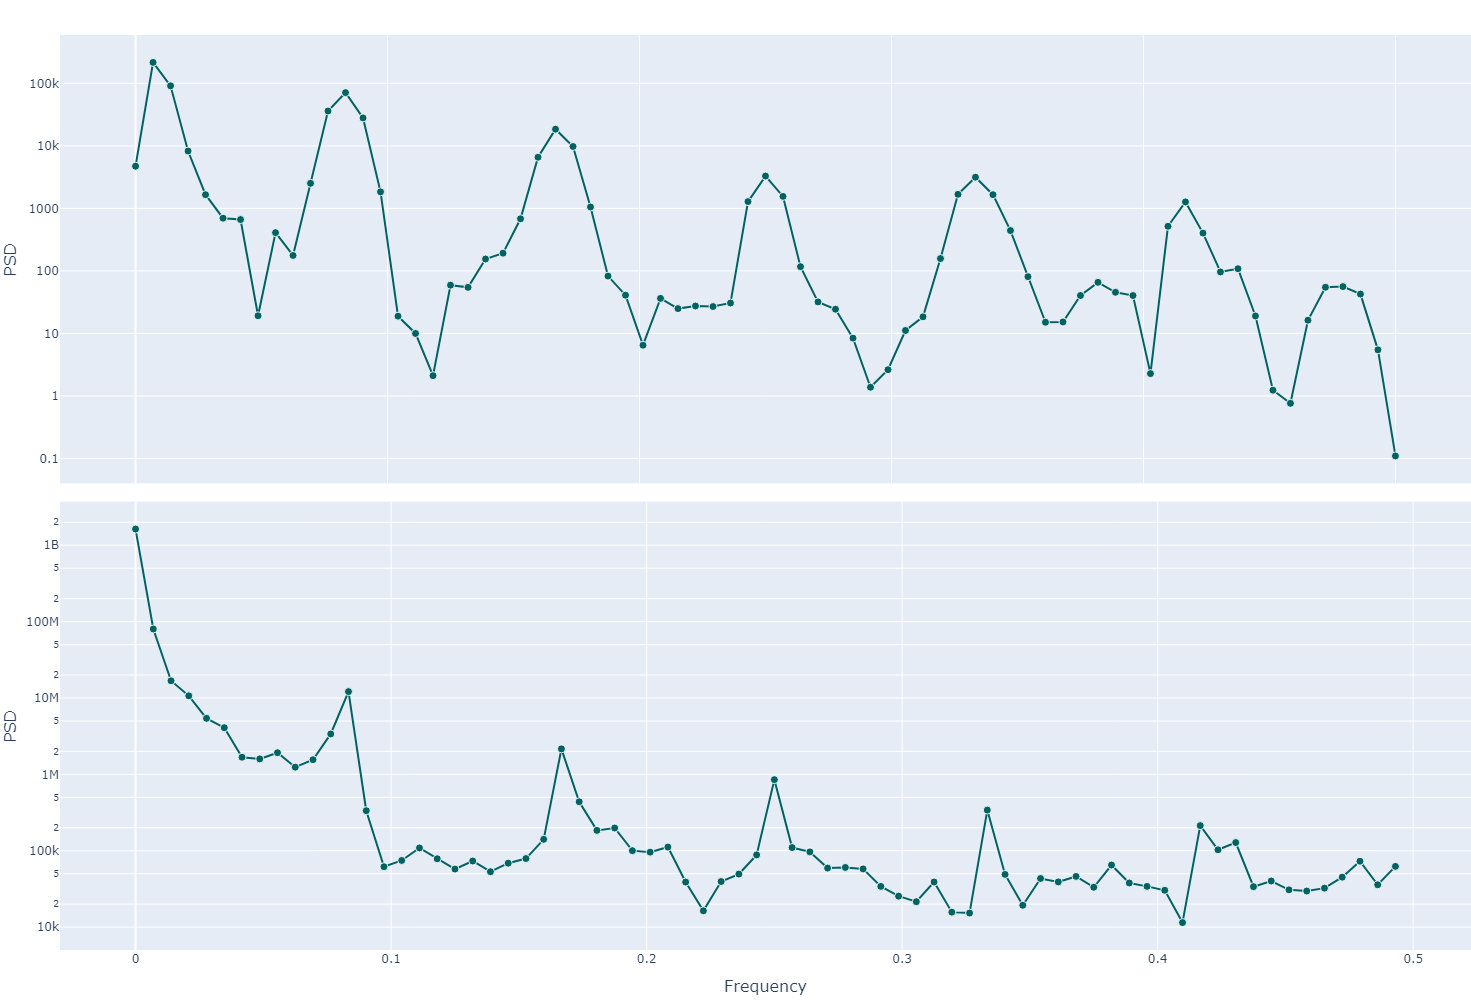

In [8]:
with atom.canvas(rows=2, cols=1, sharex=True, vspace=0.01, legend=None):
    atom.plot_periodogram()
    atom.plot_fft()

In [9]:
# It's also possible to compute the seasonality
sp = atom.get_seasonal_period()
sp

[12, 24, 36, 11, 48]

In [10]:
# And use that seasonality
atom.sp = sp

## Run the pipeline

In [11]:
# Use the regular data cleaning methods to transform the target column
atom.scale(columns=-1)

Fitting Scaler...
Scaling features...


In [12]:
atom.y

Period
1949-01   -1.388211
1949-02   -1.324254
1949-03   -1.175021
1949-04   -1.207000
1949-05   -1.292275
             ...   
1960-08    3.877562
1960-09    2.832935
1960-10    2.331940
1960-11    1.575119
1960-12    2.022816
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [13]:
atom.run(["AutoARIMA", "TBATS", "Prophet"])


Training ========================= >>
Models: AutoARIMA, TBATS, Prophet
Metric: mape


Results for AutoARIMA:
Fit ---------------------------------------------
Train evaluation --> mape: -1.2991
Test evaluation --> mape: -0.1214
Time elapsed: 1.852s
-------------------------------------------------
Time: 1.852s


Results for TBATS:
Fit ---------------------------------------------
Train evaluation --> mape: -1.1261
Test evaluation --> mape: -0.3558
Time elapsed: 31.604s
-------------------------------------------------
Time: 31.604s


Results for Prophet:
Fit ---------------------------------------------
Train evaluation --> mape: -1.0705
Test evaluation --> mape: -0.2015
Time elapsed: 0.236s
-------------------------------------------------
Time: 0.236s


Final results ==================== >>
Total time: 33.694s
-------------------------------------
AutoARIMA --> mape: -0.1214 !
TBATS     --> mape: -0.3558
Prophet   --> mape: -0.2015


## Analyze the results

In [14]:
atom.evaluate()

mae    mape     mse      r2    rmse
AutoARIMA -0.2094 -0.1214 -0.0629  0.9103 -0.2507
TBATS     -0.5555 -0.3558 -0.3922  0.4403 -0.6263
Prophet   -0.3501 -0.2015 -0.1812  0.7415 -0.4256

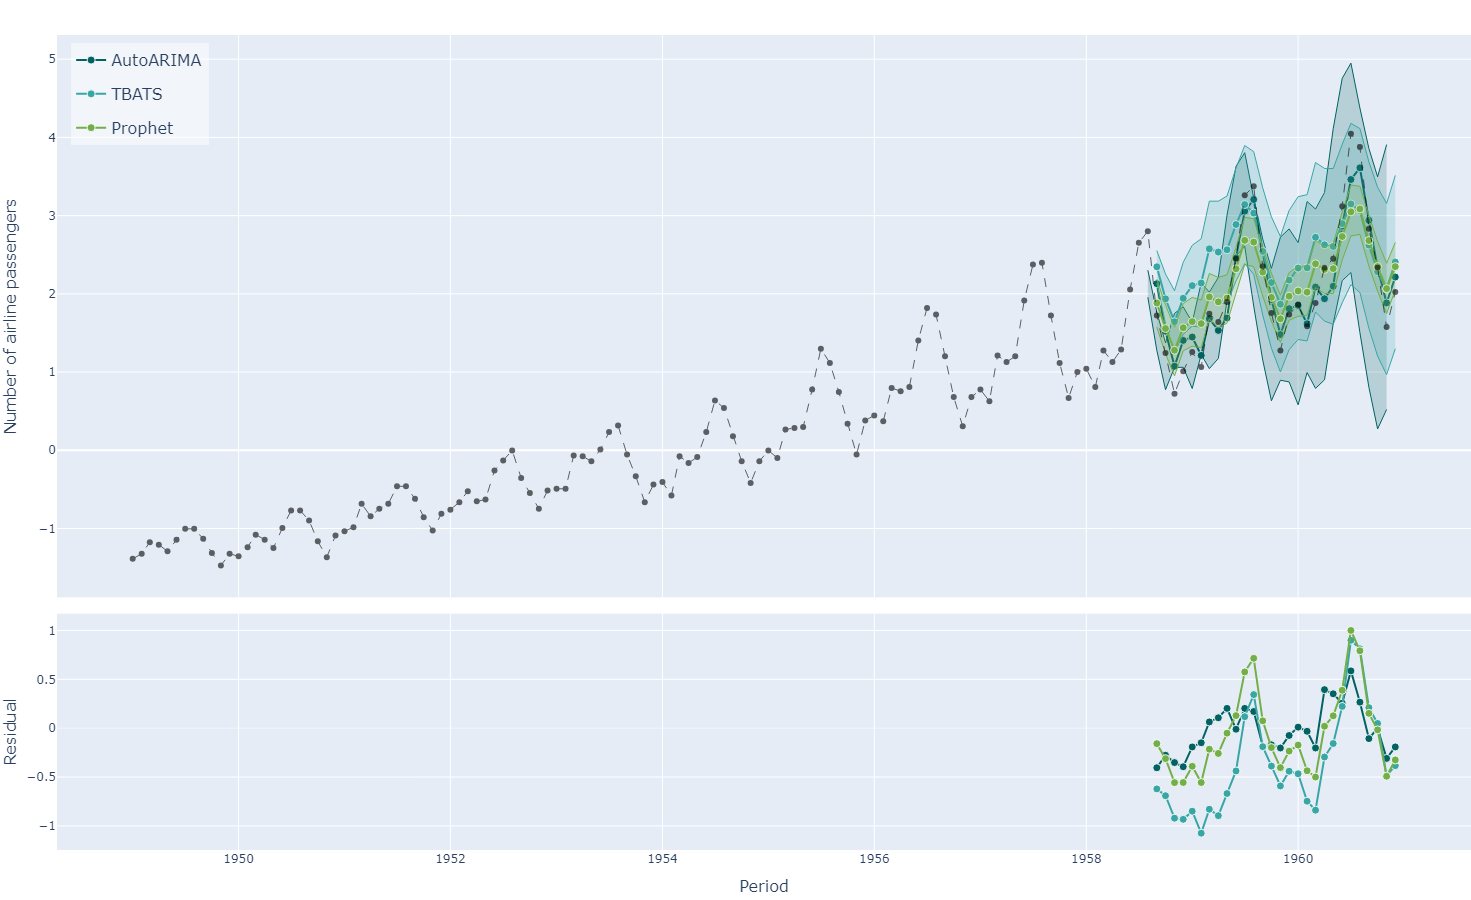

In [15]:
atom.winner.plot_forecast()

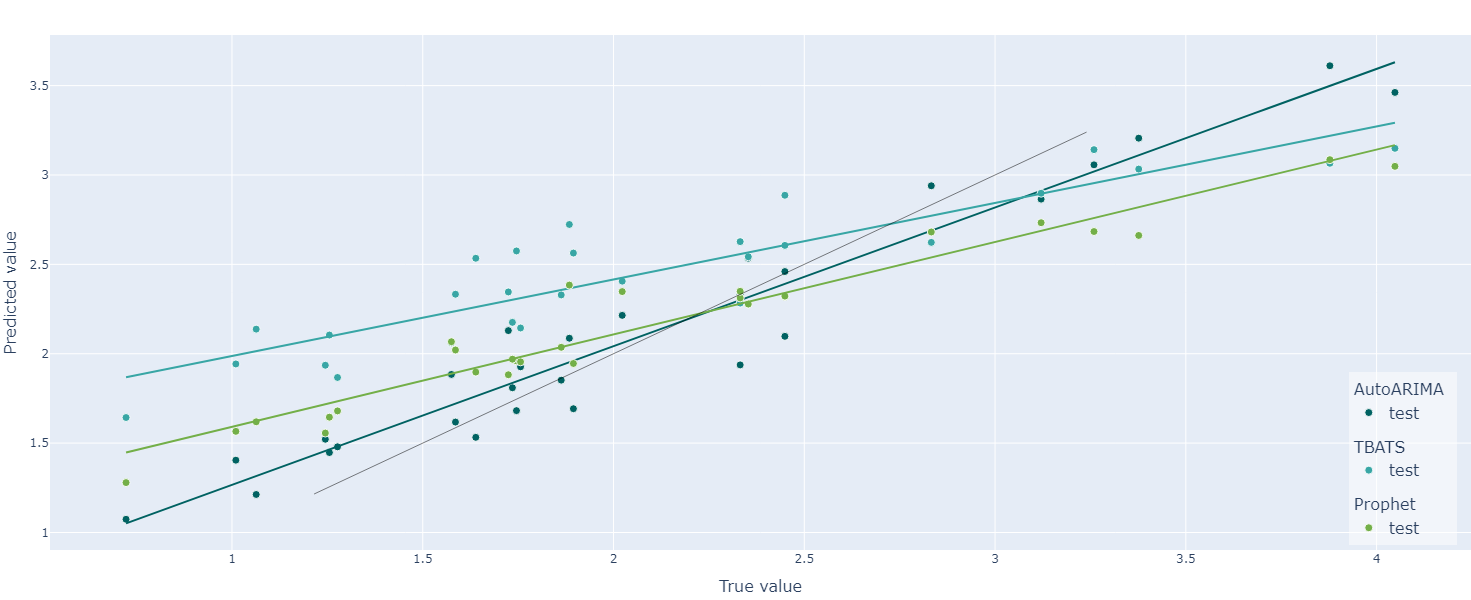

In [16]:
atom.plot_errors()